In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os


In [2]:
base_dir=os.curdir + "\\images"

physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)


[]


In [3]:
IMAGE_SIZE=256
BATCH_SIZE=64

#pre-processing
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1)

test_datagen = ImageDataGenerator(  rescale=1./255,
                                    validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                subset='training')

test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                subset='validation')


Found 6146 images belonging to 19 classes.
Found 674 images belonging to 19 classes.


In [4]:
cnn = Sequential()
cnn.add(layers.Conv2D(filters=32, padding='same', strides=2, kernel_size=3, activation='relu', input_shape=(256,256,3)))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=64, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=128, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(19, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [5]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:

hist = cnn.fit(train_datagen, epochs=25, verbose=1, validation_data=test_datagen)

Epoch 1/25
97/97 [==============================] - 116s 1s/step - loss: 2.4092 - accuracy: 0.2651 - val_loss: 2.2308 - val_accuracy: 0.2685
Epoch 2/25
97/97 [==============================] - 68s 696ms/step - loss: 2.1690 - accuracy: 0.2956 - val_loss: 2.0748 - val_accuracy: 0.3665
Epoch 3/25
97/97 [==============================] - 67s 689ms/step - loss: 1.9722 - accuracy: 0.3527 - val_loss: 1.8221 - val_accuracy: 0.3680
Epoch 4/25
97/97 [==============================] - 67s 686ms/step - loss: 1.7901 - accuracy: 0.3991 - val_loss: 1.7108 - val_accuracy: 0.3961
Epoch 5/25
97/97 [==============================] - 67s 687ms/step - loss: 1.6406 - accuracy: 0.4714 - val_loss: 1.5929 - val_accuracy: 0.4659
Epoch 6/25
97/97 [==============================] - 67s 689ms/step - loss: 1.5179 - accuracy: 0.5257 - val_loss: 1.5307 - val_accuracy: 0.4926
Epoch 7/25
97/97 [==============================] - 67s 689ms/step - loss: 1.4456 - accuracy: 0.5485 - val_loss: 1.3957 - val_accuracy: 0.5341
E

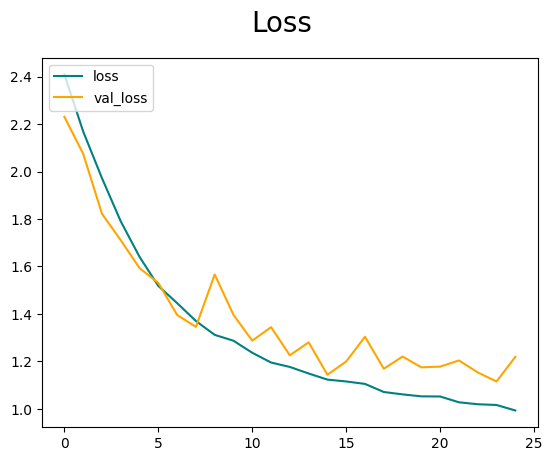

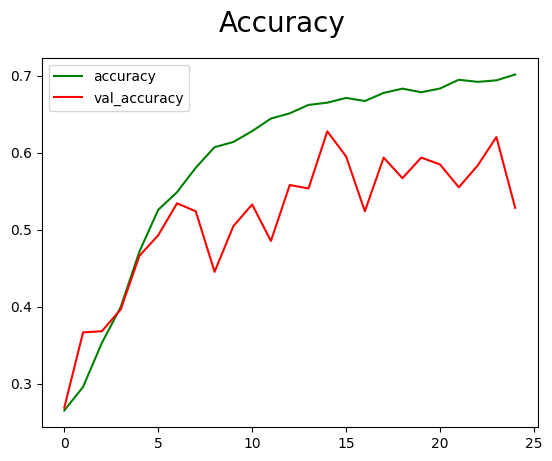

In [7]:
# Loss Plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Accuracy Plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()